In [2]:
from sympy import symbols, pi, log, cos, sqrt
from sympy.solvers import solve

from sympy import init_printing
from IPython.display import Latex
init_printing()

Using Robert Konik's notes

In [3]:
kB = 8.617333e-2 # meV/K

Define symbols

In [4]:
T_N, J_tilde, J_c = symbols(r'T_N \tilde{J} J_c')
k_x, k_y, k_z = symbols('k_x k_y, k_z')

Define magnetic dispersion to check have have the correct exchange parameter

In [5]:
J_k = 2*J_tilde*(cos(k_x) + cos(k_y)) + 2*J_c*cos(k_z)
E_k = sqrt(J_k.subs([(k_x, 0), (k_y, 0), (k_z, 0)])**2 
          - J_k**2)

The energy at $(\pi, 0)$ should be 200 meV, which implies a $\tilde{J}=50$ meV

In [6]:
E_k.subs([(k_x, pi), (k_y, 0), (k_z, 0), (J_tilde, 50), (J_c, 0)])

Robert's expression for $T_n$ is

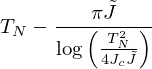

In [7]:
expr = T_N - pi * J_tilde / log(T_N**2 / (4*J_tilde *J_c))
expr

Solve what $J_c$ is required to reproduce experimental $T_N$

In [8]:
sol = solve(expr, J_c)[0]
T_N_experiment = 240 * kB # in meV
J_c_val = sol.subs([(J_tilde, 50.), (T_N, T_N_experiment)]).evalf()
Latex(r'$J_c = {:.2f}$ $\mu$eV'.format(J_c_val*1e3))

<IPython.core.display.Latex object>

Predict $T_N$ based on $J_p = 15.86 \mu$eV taken from PRB Phys. Rev. B 94, 224420 (2016)

In [9]:
sol = solve(expr, T_N)[0]
T_N_prediction = sol.subs([(J_tilde, 60.), (J_c, 16e-3)]).evalf()
Latex(r'$T_N = {:.1f}$ K'.format(T_N_prediction/kB))

<IPython.core.display.Latex object>